In [2]:
import pandas as pd
import os 
import numpy as np

In [3]:
pwd

'/data/shexuan/sjj/new_paper'

In [9]:
outdir = '/data/shexuan/sjj/new_paper/ENc'
indir = '/data/shexuan/sjj/new_paper/filtered_data/'

infiles = [os.path.join(indir, f) for f in os.listdir(indir) if f.endswith('.txt')]
outfiles = [os.path.join(outdir, f) for f in os.listdir(indir) if f.endswith('.txt')]
out_files = []
blk_files = []

for i, o in zip(infiles, outfiles):
    print('\n')
    print(i)
    print(o[:-4]+'.out')
    print(o[:-4]+'.blk')
    out_files.append(o[:-4]+'.out')
    blk_files.append(o[:-4]+'.blk')



/data/shexuan/sjj/new_paper/filtered_data/Miscanthus_floridulus.txt
/data/shexuan/sjj/new_paper/ENc/Miscanthus_floridulus.out
/data/shexuan/sjj/new_paper/ENc/Miscanthus_floridulus.blk


/data/shexuan/sjj/new_paper/filtered_data/Miscanthus_sacchariflorus.txt
/data/shexuan/sjj/new_paper/ENc/Miscanthus_sacchariflorus.out
/data/shexuan/sjj/new_paper/ENc/Miscanthus_sacchariflorus.blk


/data/shexuan/sjj/new_paper/filtered_data/Miscanthus_transmorrisonensis.txt
/data/shexuan/sjj/new_paper/ENc/Miscanthus_transmorrisonensis.out
/data/shexuan/sjj/new_paper/ENc/Miscanthus_transmorrisonensis.blk


/data/shexuan/sjj/new_paper/filtered_data/Saccharum_spontaneum.txt
/data/shexuan/sjj/new_paper/ENc/Saccharum_spontaneum.out
/data/shexuan/sjj/new_paper/ENc/Saccharum_spontaneum.blk


/data/shexuan/sjj/new_paper/filtered_data/Miscanthus_giganteus.txt
/data/shexuan/sjj/new_paper/ENc/Miscanthus_giganteus.out
/data/shexuan/sjj/new_paper/ENc/Miscanthus_giganteus.blk


/data/shexuan/sjj/new_paper/filtered_d

In [11]:
import os 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [13]:
df = pd.read_csv(out_files[0], header=0, sep='\t')
df.head()

,title,T3s,C3s,A3s,G3s,CAI,CBI,Fop,Nc,GC3s,GC,L_sym,L_aa,Gravy,Aromo,Unnamed: 15
0,lcl|NC_035750.1_cds_YP_00,0.4118,0.1569,0.4717,0.1531,0.136,-0.122,0.333,45.26,0.252,0.422,123,124,-0.629839,0.040323,NaN
1,lcl|NC_035750.1_cds_YP_00,0.4266,0.2902,0.3093,0.2500,0.163,-0.155,0.330,56.87,0.411,0.436,309,328,-0.031707,0.210366,NaN
2,lcl|NC_035750.1_cds_YP_00,0.5267,0.1456,0.4451,0.1938,0.172,-0.140,0.332,47.27,0.245,0.335,497,515,-0.167961,0.166990,NaN
3,lcl|NC_035750.1_cds_YP_00,0.4833,0.2233,0.3415,0.1515,0.250,0.094,0.471,47.98,0.308,0.441,331,353,0.363740,0.167139,NaN
4,lcl|NC_035750.1_cds_YP_00,0.4375,0.2212,0.3554,0.1676,0.188,-0.025,0.391,48.35,0.324,0.451,460,487,0.276181,0.143737,NaN


In [17]:
out_files = sorted(out_files)
out_files

['/data/shexuan/sjj/new_paper/ENc/Miscanthus_floridulus.out',
 '/data/shexuan/sjj/new_paper/ENc/Miscanthus_giganteus.out',
 '/data/shexuan/sjj/new_paper/ENc/Miscanthus_sacchariflorus.out',
 '/data/shexuan/sjj/new_paper/ENc/Miscanthus_sinensis.out',
 '/data/shexuan/sjj/new_paper/ENc/Miscanthus_transmorrisonensis.out',
 '/data/shexuan/sjj/new_paper/ENc/Saccharum_spontaneum.out',
 '/data/shexuan/sjj/new_paper/ENc/Sorghum_bicolor.out']

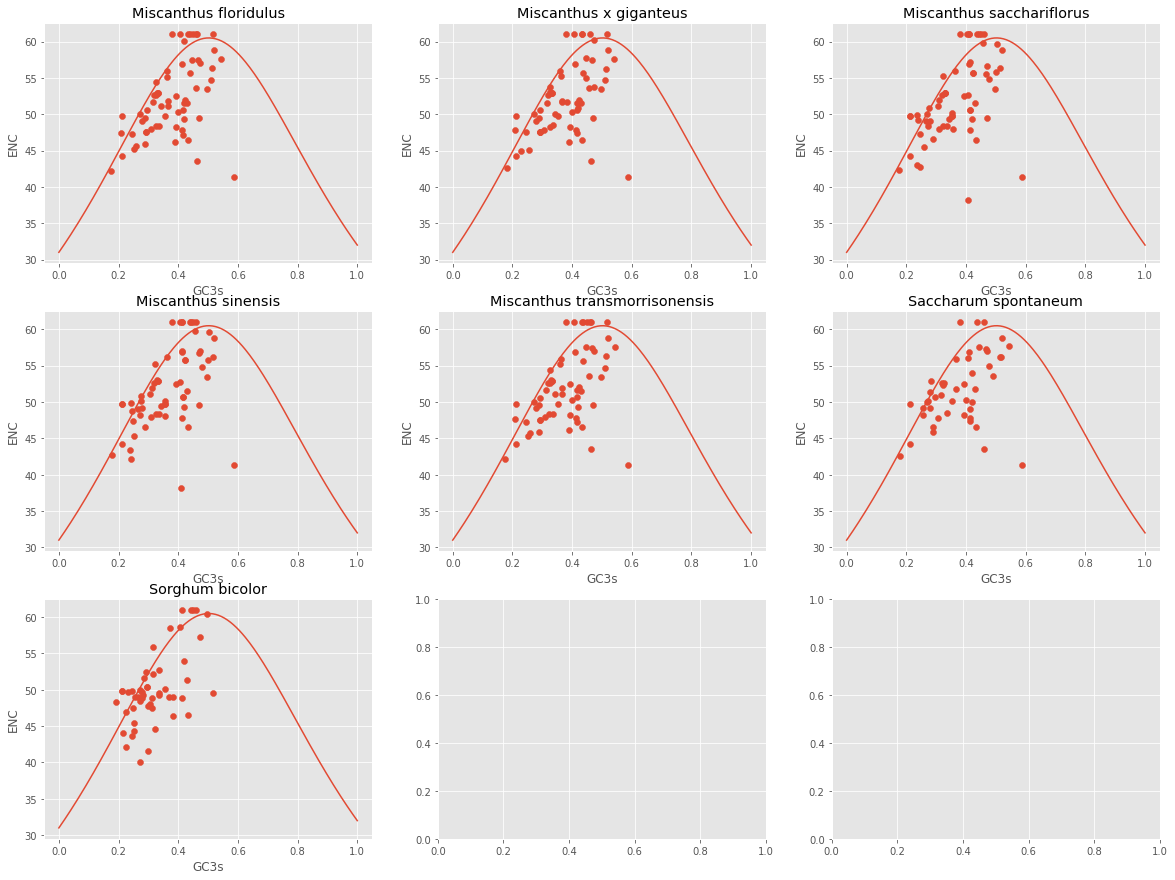

<Figure size 1000x800 with 0 Axes>

In [31]:
enc = lambda x: (2 + x + 29 / (x**2 + (1 - x)**2))
fig, ax = plt.subplots(3, 3, squeeze=False,figsize=(20,15))

def plot_enc(file, tit, axes):
    #plt.subplot(231)
    df = pd.read_csv(file, header=0, sep='\t')
    # 生成绘制曲线需要的数据
    x = list(np.linspace(0,1,201))
    y = [enc(i) for i in x]
    axes.plot(x,y)
    axes.scatter(df['GC3s'], df['Nc'])
    axes.title.set_text(tit)
    axes.set_xlabel('GC3s')
    axes.set_ylabel('ENC')


plt.figure(dpi=100, figsize=(10, 8))
plot_enc(out_files[0], 'Miscanthus floridulus', ax[0,0])
plot_enc(out_files[1], 'Miscanthus x giganteus', ax[0,1])
plot_enc(out_files[2], 'Miscanthus sacchariflorus', ax[0,2])
plot_enc(out_files[3], 'Miscanthus sinensis', ax[1,0])
plot_enc(out_files[4], 'Miscanthus transmorrisonensis', ax[1,1])
plot_enc(out_files[5], 'Saccharum spontaneum', ax[1,2])
plot_enc(out_files[6], 'Sorghum bicolor', ax[2,0])

plt.tight_layout()

plt.savefig('Step4_enc_plot.jpg')